### Item graph

Every item is a node in a graph.
Two items bought together has an edge.

Try to get the connected components.


In [1]:
import base
import pandas as pd
import numpy as np

df = pd.read_hdf('assoc_table')

In [2]:
graph = pd.DataFrame(df)
for col in graph:
    graph.loc[col, col] = 0

(array([ 787.,   54.,    8.,    7.,    1.,    1.,    0.,    0.,    0.,    1.]),
 array([  0. ,   2.2,   4.4,   6.6,   8.8,  11. ,  13.2,  15.4,  17.6,
         19.8,  22. ]),
 <a list of 10 Patch objects>)

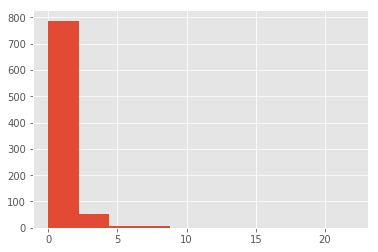

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.hist(np.max(graph))


In [15]:
branch_num = 0
nodes = np.array(graph.index)
node_label = dict(zip(nodes, np.zeros_like(nodes)))
node_dict = dict(zip(nodes, range(len(nodes))))
head = 0

def label_nodes(start_node, label):
    if node_label[start_node] == 0:
        node_label[start_node] = label
        if start_node in graph:
            next_nodes = nodes[graph[start_node] > 0]
            for node in next_nodes:
                label_nodes(node, label)
        else:
            next_nodes = graph.columns[graph.loc[start_node] > 0]
            for node in next_nodes:
                label_nodes(node, label)
    else:
        return

for node in nodes:
    if node_label[node] == 0:
        branch_num += 1
        label_nodes(node, branch_num)
        
print branch_num


347


In [18]:
branches = pd.DataFrame({'sku_id': node_label.keys(),
                        'branch': node_label.values()})
branches = branches.set_index('sku_id')
branches

,branch
sku_id,
40964,1
32774,313
49160,1
147466,1
8210,1
49178,1
73755,279
32796,1
13659,1


(array([ 2166.,    45.,    36.,    37.,    43.,    38.,    40.,    36.,
           37.,    36.]),
 array([   1. ,   35.6,   70.2,  104.8,  139.4,  174. ,  208.6,  243.2,
         277.8,  312.4,  347. ]),
 <a list of 10 Patch objects>)

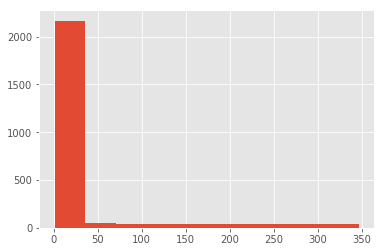

In [19]:
plt.hist(branches['branch'])
